# 1. Importation des Bibliotheques Nécessaires

In [1]:
import sys
import os

# Ajoute le chemin du dossier parent à sys.path
notebook_dir = os.path.abspath('..')  # Dossier parent de "notebook/"
sys.path.append(notebook_dir)

from fonctions.fct_importation import *
from fonctions.fct_preprocess import *
from fonctions.fct_stat_desc import *

import_packages()

c:\Users\theol\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2. Importation des Données Brutes

Import et Concatenations des données brutes en un unique Dataframe

In [2]:
df = etl(r"..\data\data_raw")
df.head(5)

**************************************************
Démarrage du processus d'importation

Importation du fichier HousePrice_Bronx_County.csv
Importation du fichier HousePrice_Brooklyn.csv
Importation du fichier HousePrice_Brooklyn_Heights.csv
Importation du fichier HousePrice_Coney_Island.csv
Importation du fichier HousePrice_Dumbo.csv
Importation du fichier HousePrice_East_Bronx.csv
Importation du fichier HousePrice_Flushing.csv
Importation du fichier HousePrice_Fort_Hamilton.csv
Importation du fichier HousePrice_Jackson_Heights.csv
Importation du fichier HousePrice_Kings_County.csv
Importation du fichier HousePrice_Manhattan.csv
Importation du fichier HousePrice_New_York.csv
Importation du fichier HousePrice_New_York_County.csv
Importation du fichier HousePrice_Queens.csv
Importation du fichier HousePrice_Queens_County.csv
Importation du fichier HousePrice_Rego_Park.csv
Importation du fichier HousePrice_Richmond_County.csv
Importation du fichier HousePrice_Riverdale.csv
Importation du

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Keller Williams Ny Realty,Multi-family home for sale,1100000,6,3.000000,2837.000000,1038 Throggs Neck Expy Unit Sr,"Bronx, NY 10465","1038 Throggs Neck Expy Unit SrBronx, NY 10465",United States,New York,Bronx County,The Bronx,Throgs Neck Expressway,"1038 Throgs Neck Expy, Bronx, NY 10465, USA",40.834394,-73.822110
1,NoBroker,Multi-family home for sale,925000,5,2.000000,2750.000000,543 Hollywood Ave,"Bronx, NY 10465","543 Hollywood AveBronx, NY 10465",United States,New York,Bronx County,The Bronx,Hollywood Avenue,"543 Hollywood Ave, Bronx, NY 10465, USA",40.824239,-73.817381
2,Brokered by Exp Realty,Multi-family home for sale,700000,6,2.000000,3053.000000,229 W Tremont Ave Unit A,"Bronx, NY 10453","229 W Tremont Ave Unit ABronx, NY 10453",United States,New York,Bronx County,The Bronx,West Tremont Avenue,"229 W Tremont Ave, Bronx, NY 10453, USA",40.852813,-73.917687
3,Brokered by Meyers Enterprise Realty Group,Land for sale,119000,3,2.373861,2184.207862,3652 DE Reimer Ave,"Bronx, NY 10466","3652 DE Reimer AveBronx, NY 10466",United States,New York,Bronx County,The Bronx,De Reimer Avenue,"3652 De Reimer Ave, Bronx, NY 10466, USA",40.884170,-73.838839
4,Brokered by Prospes Real Estate Corp,Multi-family home for sale,600000,2,2.000000,2184.207862,1406 Mac Donough Pl,"Bronx, NY 10465","1406 Mac Donough PlBronx, NY 10465",United States,New York,Bronx County,The Bronx,Mac Donough Place,"1406 Mac Donough Pl, Bronx, NY 10465, USA",40.842954,-73.824959


# 3.Traitement des Données

Creation d'une variable "Borough" qui attribue (en fonction des adresses) à chaque bien immobilier son quartier de residence parmis les 5 grands quartiers de New-York : Queens, Manhattan, Brooklyn, The Bronx et Staten Island. Les quartiers de New-Yorks ont des adresses postales différentes de leurs noms communs et cela c'est pas uniforme dans notre base de donnée (par exemple certaines adresses parlerons de "Brooklyn" et d'autre de "Kings County" qui sont des équivalents) 

In [3]:
assign_borough(df)

df[['PRICE','BOROUGH']].head(5)


*** Grouping Borough OK ***


,PRICE,BOROUGH
0,1100000,Bronx
1,925000,Bronx
2,700000,Bronx
3,119000,Bronx
4,600000,Bronx


Suppression des colonnes inutiles a l'anayse (Principalements les variables liés a l'adresse)

In [4]:
drop_useless_columns(df)

df.head(5)


*** Drop Useless Columns OK ***


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,BOROUGH
0,Multi-family home for sale,1100000,6,3.000000,2837.000000,Bronx
1,Multi-family home for sale,925000,5,2.000000,2750.000000,Bronx
2,Multi-family home for sale,700000,6,2.000000,3053.000000,Bronx
3,Land for sale,119000,3,2.373861,2184.207862,Bronx
4,Multi-family home for sale,600000,2,2.000000,2184.207862,Bronx


Regroupements des modalités trop peu représenters (TYPE) + Suppression des données aberrantes (PRICE) + arondissement des FLOAT en INT

In [5]:
low_modalities_grouping(df)
filter_price_range(df)
round_and_convert_to_int(df, columns=['BATH', 'PROPERTYSQFT'])

df.head(5)


*** Low Modalities Grouping  OK ***

*** Filter Price Range OK ***

*** Round and Convert to Integer  OK ***


,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,BOROUGH
0,Multi-family home for sale,1100000,6,3,2837,Bronx
1,Multi-family home for sale,925000,5,2,2750,Bronx
2,Multi-family home for sale,700000,6,2,3053,Bronx
3,Autre_Type,119000,3,2,2184,Bronx
4,Multi-family home for sale,600000,2,2,2184,Bronx


Export des données traitées en CSV

In [6]:
df.to_csv(r'..\data\data_clean\data_preprocess.csv', index=False)
print("\nClean data saved OK")


Clean data saved OK


# 4. Statsitiques Descriptives des Données Traitées

Valeurs Manquantes et Nombre de Valeur Disctinctes par Variables

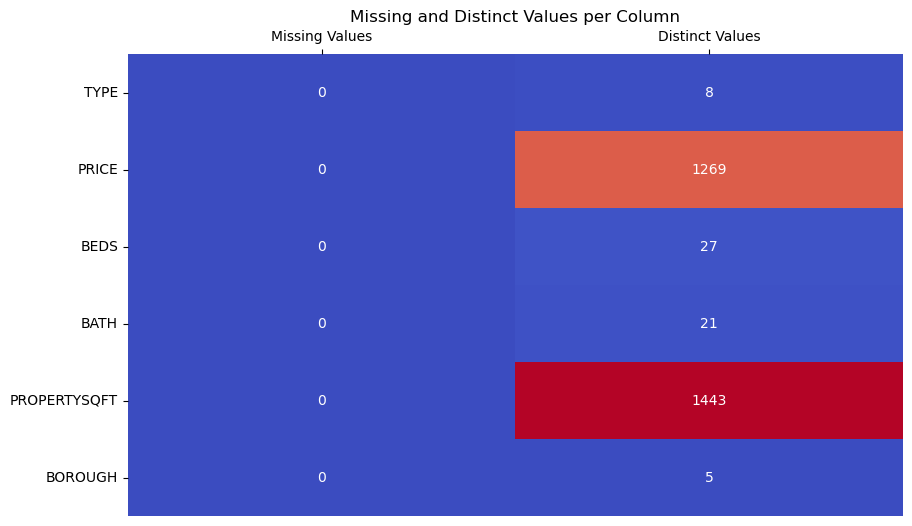

In [7]:
analyze_and_plot(df)

Pie Chart des Distributions au sein des Variables Qualitatives

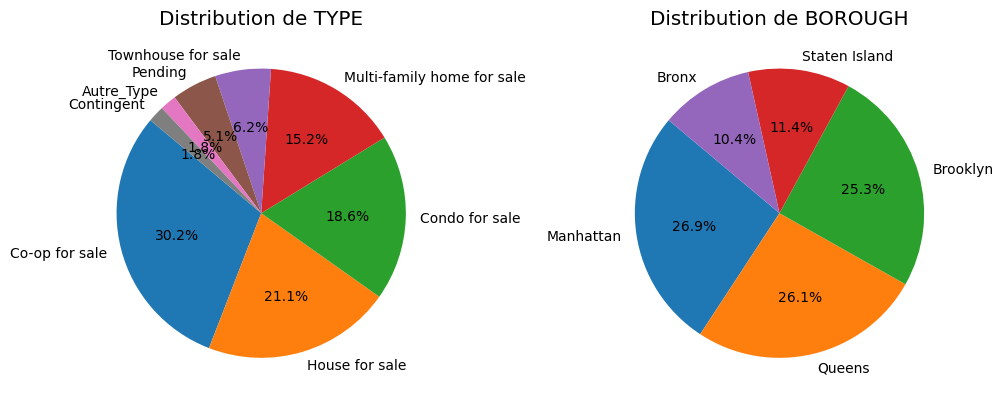

In [8]:
plot_pie_charts(df)

Graphiques de Densités et Boxplots des Variables Quantitatives

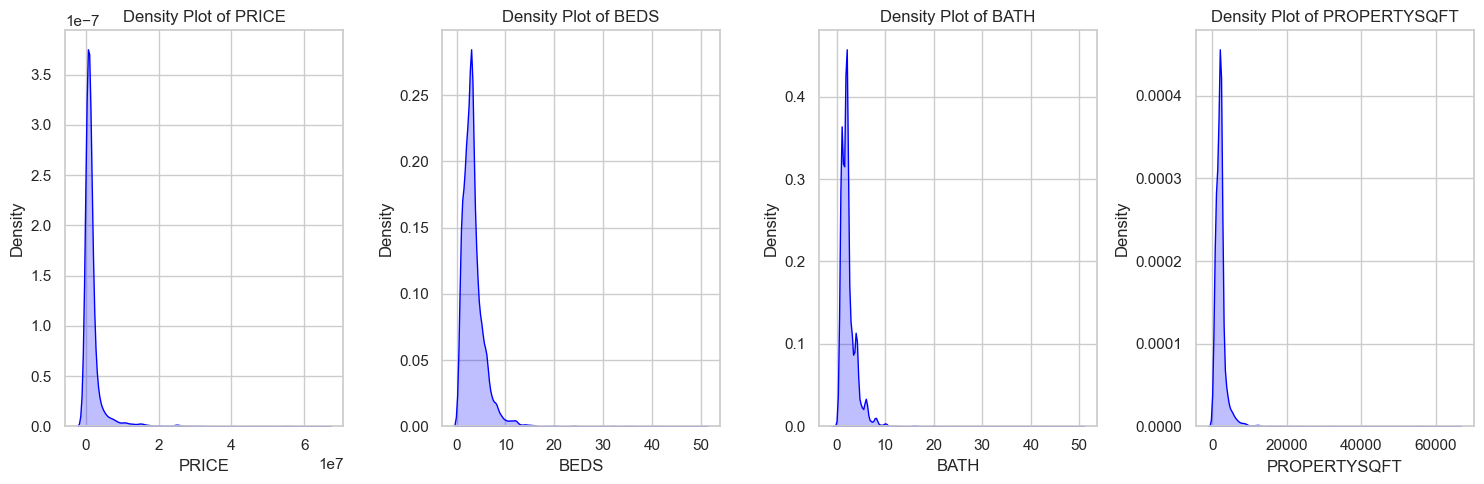

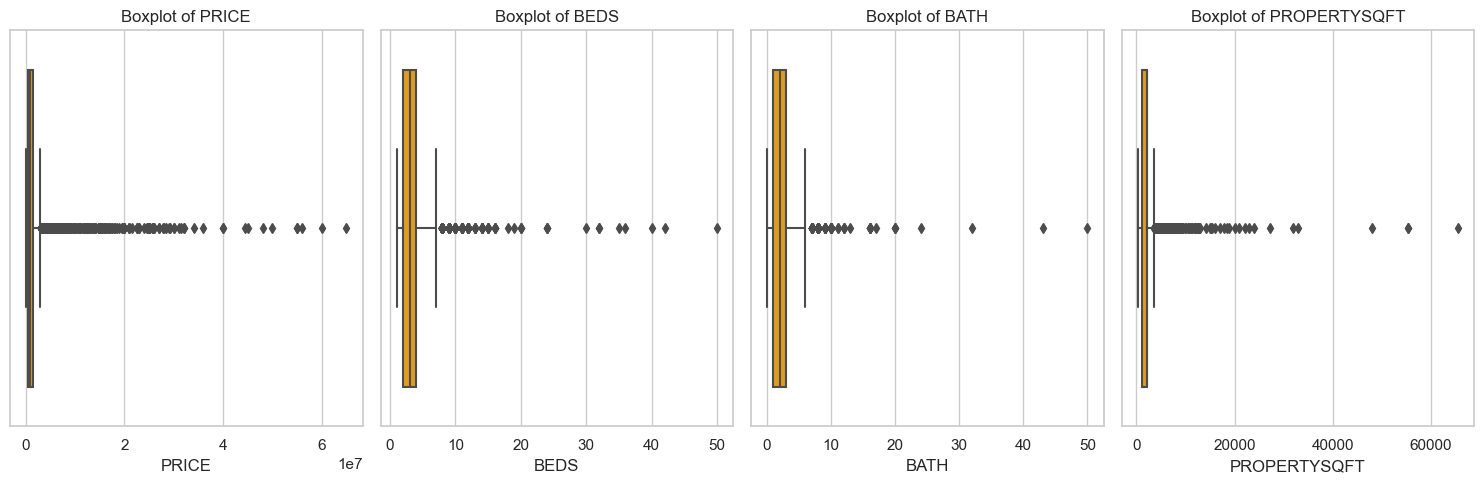

In [ ]:
plot_density(df)

# 5. Entrainement du Modèle

# 6. Evaluation du Modèle